# Tutorial: Epidemiology Models


## Computational Economics  (ECO309)



H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forwards looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
In each period, one agent meets another agent drawn randomly.
During a meeting Susceptible agents who meet an infected agent, will always catch the disease (or the fad) but are not contagious. Infected agents, have a probability $\pi$ of being recovered. Nothing happens to Recovered agents who meet other people. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



We have 

$$\begin{aligned}
n_{S, t+1} &= n_{S, t} - \underbrace{n_{S, t} n_{I, t}}_{\textrm{newly infected}}\\
n_{I, t+1} &= (1-\pi) n_{I, t} + \underbrace{n_{S, t} n_{I, t}}_{\textrm{newly infected}} \\
n_{R, t+1} &= n_{R, t} + \pi n_{I, t}
\end{aligned}
$$

__Compute the transition function `f` for the vector state $s_t$ returning $s_{t+1}$__



In [1]:
s0 = [0.9, 0.1, 0.0] #

3-element Vector{Float64}:
 0.9
 0.1
 0.0

In [2]:
function f(s; π=0.05)
    # n_S = s[1]*(1-s[2])
    # n_I = s[1]*s[2] - π*s[2]
    # n_R = s[3] + π*s[2]
    n_S = s[1] - s[1]s[2]
    n_I = (1-π)s[2] + s[1]s[2]
    n_R = s[3] + π*s[2]
    S = [n_S, n_I, n_R]
    return S
end

f (generic function with 1 method)

In [3]:
# sum(f(s0)), f(s0)
println("New S: $(f(s0)[1]), New I: $(f(s0)[2]), New R: $(f(s0)[3]), and S+I+R = $(sum(f(s0)))")

New S: 0.81, New I: 0.185, New R: 0.005000000000000001, and S+I+R = 1.0


__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



In [4]:
# s0 = [0.9, 0.1, 0.01]
# s0 = [0.9, 0.06, 0.04]
s0 = [0.9, 0.1, 0.0]
simulations = []
for t in 1:50
    s1 = f(s0)
    push!(simulations, s1)
s0 = s1
end

In [5]:
simulations

50-element Vector{Any}:
 [0.81, 0.185, 0.005000000000000001]
 [0.66015, 0.3256, 0.01425]
 [0.44520516, 0.52426484, 0.03053]
 [0.21179974802542562, 0.7314570099745743, 0.056743242]
 [0.05687733762137956, 0.8498065698798917, 0.09331609249872871]
 [0.008542602433454477, 0.8556509765738222, 0.1358064209927233]
 [0.0012331163187872442, 0.8201779138597982, 0.17858896982141442]
 [0.0002217415488978483, 0.7801803929366977, 0.21959786551440433]
 [4.8743140148333033e-5, 0.7413443716986123, 0.2586068851612392]
 [1.2607687540449673e-5, 0.7043132885662895, 0.2956741037461698]
 ⋮
 [2.9344413937891553e-12, 0.1364362070066106, 0.8635637929904539]
 [2.534077340337371e-12, 0.12961439665668045, 0.8703856033407845]
 [2.205624434788177e-12, 0.12313367682417488, 0.8768663231736186]
 [1.9340377884394664e-12, 0.11697699298323772, 0.8830230070148273]
 [1.7077998636318664e-12, 0.11112814333430206, 0.8888718566639892]
 [1.5180152355998828e-12, 0.10557173616777672, 0.8944282638307043]
 [1.3577557316484666e-12, 0.

In [6]:
# import Pkg; Pkg.add("Plots")

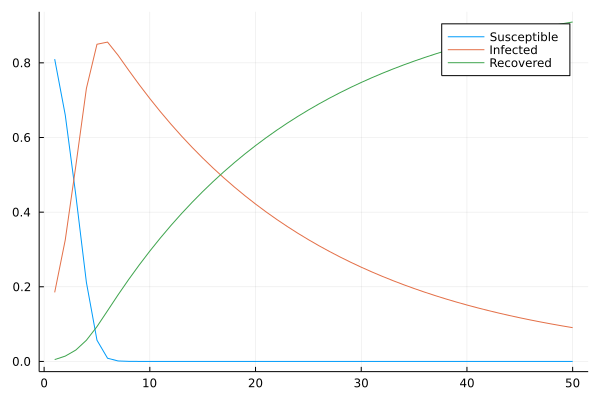

In [7]:
using Plots
x = 1:50
susc = [e[1] for e in simulations]
inf = [e[2] for e in simulations]
rec = [e[3] for e in simulations]
plot(x, susc, label = "Susceptible")
plot!(x, inf, label = "Infected")
plot!(x, rec, label = "Recovered")

New S: 1.4310621641468376e-13, New I: 0.08598883893333811, New R: 0.9140111610665177, and S+I+R = 0.9999999999999989


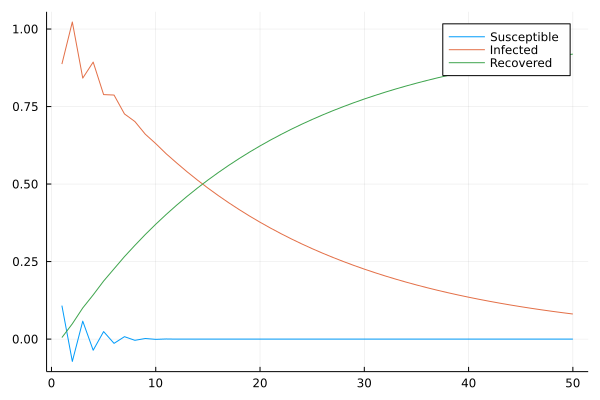

In [8]:
function f2(s; π=0.05, μ = 0.78)
    # n_S = s[1]*(1-s[2])
    # n_I = s[1]*s[2] - π*s[2]
    # n_R = s[3] + π*s[2]
    n_S = (1-μ)*s[1] - s[1]s[2]
    n_I = (1-π)*s[2] + s[1]s[2] + μ*s[1]
    n_R = s[3] + π*s[2]
    S = [n_S, n_I, n_R]
    return S
end

println("New S: $(f2(s0)[1]), New I: $(f2(s0)[2]), New R: $(f(s0)[3]), and S+I+R = $(sum(f2(s0)))")

s0 = [0.9, 0.1, 0.0]
simulations2 = []
for t in 1:50
    s1 = f2(s0)
    push!(simulations2, s1)
s0 = s1
end

x = 1:50
susc = [e[1] for e in simulations2]
inf = [e[2] for e in simulations2]
rec = [e[3] for e in simulations2]
plot(x, susc, label = "Susceptible")
plot!(x, inf, label = "Infected")
plot!(x, rec, label = "Recovered")

In [9]:
# simulations[length(simulations)] .== simulations2[length(simulations2)]

__We now assume a Susceptible person who meets an infected one has a probability $\mu$ of catching the disease. Update the transition function. Update function $f$ and write a function of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"? How would you choose parameters $\Pi$ and $\mu$__ 

Updated function in the above block. As we increase $\mu$, the beginning seems to be more volatile for the number of susceptible and infected individuals but the end behaviour seems the same. By running `simulations[length(simulations)] .== simulations2[length(simulations2)]`, we indeed are able to confirm that the end results are identical. This would suggest that social distancing is ineffective, but I do not think this is empirically true (but who knows).

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$ stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu \in (0,1)$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



In [10]:
# struct Agent
#     x::Float64
#     y::Float64
#     h::Int8 # 1 -> R, 2 -> I, 3 -> S
# end

struct Status
    state::Int8
end

struct Agent
    x::Float64
    y::Float64
    status::Status
end

struct Parameters
    π::Float64
    σ::Float64
    μ::Float64
end

In [33]:
p0 = Parameters(0.1, 0.1, 0.1)

Parameters(0.1, 0.1, 0.1)

In [12]:
const SUSCEPTIBLE = Status(0)
const INFECTED = Status(1)
const RECOVERED = Status(2)

Status(2)

In [13]:
# Constructor
Agent() = Agent(rand(), rand(), SUSCEPTIBLE) # rand() is uniform between 0 and 1

Agent

In [52]:
N = 100
population = [Agent() for i = 1:N]

100-element Vector{Agent}:
 Agent(0.29495382127693737, 0.15271441033084754, Status(0))
 Agent(0.4781937328046111, 0.401847476513188, Status(0))
 Agent(0.29830711079384453, 0.947132026427662, Status(0))
 Agent(0.3463872245385077, 0.843129033835189, Status(0))
 Agent(0.7069488237365021, 0.022151198784141735, Status(0))
 Agent(0.29683179084145916, 0.06314817987452614, Status(0))
 Agent(0.1803635827255159, 0.21570993111874903, Status(0))
 Agent(0.5801731778806886, 0.93065595983121, Status(0))
 Agent(0.058151014543871615, 0.35487452535170594, Status(0))
 Agent(0.9339993313708134, 0.015112692125291538, Status(0))
 ⋮
 Agent(0.22648083876281166, 0.19869001320306778, Status(0))
 Agent(0.03835353685118692, 0.9889174886471654, Status(0))
 Agent(0.1113387077213478, 0.03700774765913439, Status(0))
 Agent(0.4179234981681822, 0.6649300526447032, Status(0))
 Agent(0.7875423575573275, 0.5015656290875757, Status(0))
 Agent(0.22444591543490922, 0.6073947364805752, Status(0))
 Agent(0.5925570254656496, 0.

__Write a function `spatial_transition(S::Vector{Agent})::Vector{Agent}` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



In [39]:
# function spatial_transition(Agent a)
#     if (a.h == 2 && rand((true, false, false, false, false))) # 20% chance, fix to general case
#         a.h = 1
#     end
# # Need to treat last case but clarify probability notions in Julia next lecture
# end

In [34]:
function move(agent::Agent, p = Parameters)
    x = agent.x + randn()*p.σ
    y = agent.y + randn()*p.σ
    return Agent(x, y, agent.status)
end

move (generic function with 2 methods)

In [35]:
s = Agent()

Agent(0.6745700366895444, 0.4428333429600222, Status(0))

In [36]:
move(s, p0)

Agent(0.6132727595562044, 0.40354904236584754, Status(0))

In [37]:
function spatial_transition(S::Vector{Agent})
    aout = [move(agent) for agent in S]
    return aout
end

spatial_transition (generic function with 1 method)

In [53]:
spatial_transition(population, p0)

MethodError: MethodError: no method matching spatial_transition(::Vector{Agent}, ::Parameters)
Closest candidates are:
  spatial_transition(::Vector{Agent}) at ~/Documents/eco309_local/eco309/tutorials/1_2_Epidemiology.ipynb:1

__Write a function `show_population` to plot all agents with different colors for different health status.__



In [42]:
# import Plots: plot, plot!
methods(plot)

# 4 methods for generic function "plot":
[1] plot(sp::Plots.Subplot, args...; kw...) in Plots at /Users/maxime/.julia/packages/Plots/5S9Hg/src/plot.jl:258
[2] plot(plt1::Plots.Plot, plt2::Plots.Plot, plts_tail::Plots.Plot...; kw...) in Plots at /Users/maxime/.julia/packages/Plots/5S9Hg/src/plot.jl:96
[3] plot(plt::Plots.Plot, args...; kw...) in Plots at /Users/maxime/.julia/packages/Plots/5S9Hg/src/plot.jl:192
[4] plot(args...; kw...) in Plots at /Users/maxime/.julia/packages/Plots/5S9Hg/src/plot.jl:82

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/maxime/.julia/packages/Plots/5S9Hg/src/args.jl:1230


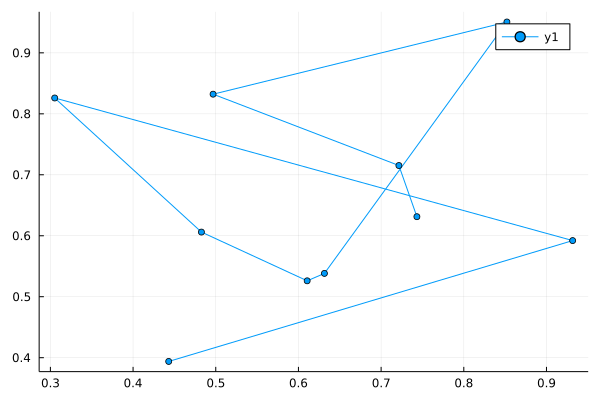

In [50]:
plot(
[a.x for a in population],
[a.y for a in population];
marker="o" # make lines invisible 
)

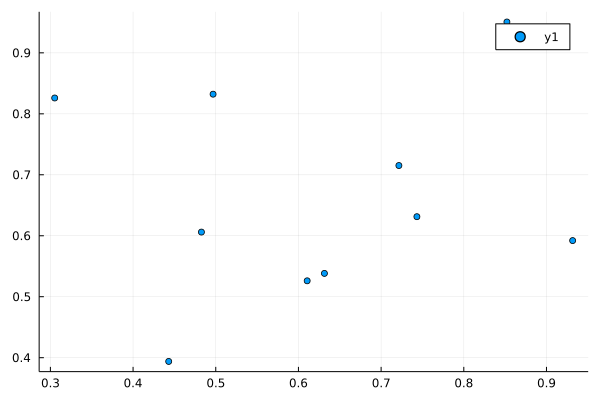

In [51]:
plot(
[a.x for a in population],
[a.y for a in population],
seriestype=scatter
)

In [57]:
function random_guess(T=100, N=100)
    pop = [Agent() for n = 1:N]
    for t in 1:T
        pop = spatial_transition(pop, p0)
    end
    return pop
end

random_guess (generic function with 3 methods)

In [58]:
random_guess(p0)

MethodError: MethodError: no method matching (::Colon)(::Int64, ::Parameters)
Closest candidates are:
  (::Colon)(::T, ::Any, !Matched::T) where T<:Real at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/range.jl:41
  (::Colon)(::A, ::Any, !Matched::C) where {A<:Real, C<:Real} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/range.jl:10
  (::Colon)(::T, ::Any, !Matched::T) where T at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/range.jl:40
  ...

In [60]:
import Plots: plot

In [61]:
function plot(population::Vector{Agent})
    plot(
    [a.x for a in population],
    [a.y for a in population],
    seriestype=scatter
    )
end

plot (generic function with 5 methods)

In [63]:
# r = random_guess(p0)

__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



In [64]:
import Base: -
(-)(a1, a2) = Agent(a1.x - a2.x, a1.y - a2.y, a1.status)

- (generic function with 268 methods)

In [65]:
distance(a1::Agent, a2::Agent) = sqrt( ((a2-a1).x)^2 + ((a2-a1).y)^2 )

distance (generic function with 1 method)

In [67]:
distance(Agent(), Agent())

0.23067515859646107

In [ ]:
function evolve(S::Vector{Agent})
    # We choose to move before being contaminated
    S = spatial_transition(S)
    for (i, agent) in enumerate(S)
        if agent.status == SUSCEPTIBLE
            
            somebody_close=false
            for (j, oagent) in enumerate(S)
                if j!=i
                    d = distance(agent, oagent)
                    if (d<p0.r) && (oagent.status == INFECTED)
                        somebody_close=true
                    end
                end
                break # Stop for loop
            end

            if somebody_close
                if rand() < p.μ
                    
                end

        elseif agent.status == INFECTED
            if rand() < p.π
                new_agent = Agent(agent.x, agent.y, RECOVERED)
            else
                new_agent = agent
            end
        elseif agent.status ==  RECOVERED
            new_agent = agent
        end
    end
end

__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

### Additional questions

Have fun by trying to answer one of these questions:
- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)

<b> Notes on Lecture 2 </b>

Console:

- REPL
- help ?
- Shell ; $\implies$ can use shell commands without leaving Julia
- Package management

In [26]:
# eps(Float16) # Smallest number we can represent in the type
eps(Float64)

2.220446049250313e-16